In [1]:
graphs=[
"easy_graph.json",
"smallRandom.json",
"xsmallComplex.json",
"smallComplex.json",
"mediumRandom.json",
"MediumComplex.json",
"largeComplex.json",
"xlargeComplex.json",
"xxlargeComplex.json"
]

local = "../Graphs/"

In [2]:
import process_DAG
import time
import json

In [4]:
time_spent={}

for i in graphs:
    print(i)
    time_start= time.clock()

    opened_graph=local + i
    with open(opened_graph) as json_file:
        data = json.load(json_file)
    full_graph = data["nodes"]
    
    time1 = time.clock() - time_start
    print(i, time1)
    
    if i != "xxlargeComplex.json":
        graph = process_DAG.init_Graph(full_graph)

        time2= time.clock() - time1

        time_spent[i]={"load_json": time1, "networkx": time2, "total": time1 + time2}
        print(i, time2)
    else:
        time_spent[i]={"load_json": time1}
    

    full_graph=None
    graph=None

easy_graph.json
easy_graph.json 0.0014080000000000759
easy_graph.json 3.823074
smallRandom.json
smallRandom.json 0.0007289999999997576
smallRandom.json 3.82486
xsmallComplex.json
xsmallComplex.json 0.002262999999999682
xsmallComplex.json 3.8415260000000004
smallComplex.json
smallComplex.json 0.003198000000000256
smallComplex.json 3.871088
mediumRandom.json
mediumRandom.json 0.005813999999999986
mediumRandom.json 3.972193
MediumComplex.json
MediumComplex.json 0.01568700000000023
MediumComplex.json 4.072281
largeComplex.json
largeComplex.json 0.1906340000000002
largeComplex.json 5.207867
xlargeComplex.json
xlargeComplex.json 5.816191
xlargeComplex.json 58.93292199999999
xxlargeComplex.json
xxlargeComplex.json 21.343953


## Test avec nouveau parser

In [5]:
import new_graph_parser

for i in graphs[:-1]:
    print(i)
    time_start= time.clock()

    full_graph=new_graph_parser.init_graph(local + i)
    
    time1 = time.clock() - time_start
    print(i, time1)
    time_spent[i]["new_method"]=time1
    full_graph=None

easy_graph.json
easy_graph.json 0.0008859999999799584
smallRandom.json
smallRandom.json 0.00461200000000872
xsmallComplex.json
xsmallComplex.json 0.04276400000000535
smallComplex.json
smallComplex.json 0.060421000000019376
mediumRandom.json
mediumRandom.json 0.0635120000000029
MediumComplex.json
MediumComplex.json 0.28686799999999835
largeComplex.json
largeComplex.json 1.9766419999999982
xlargeComplex.json
xlargeComplex.json 74.09474699999998


In [9]:
import pandas as pd
df_new=pd.DataFrame(time_spent)

In [ ]:
df_new

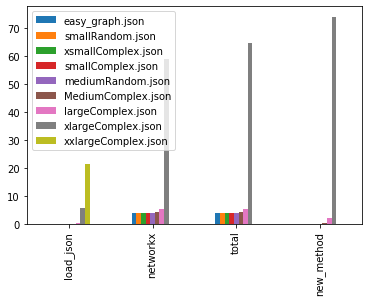

In [14]:
df_new.plot.bar()